In [12]:
import os
os.chdir("/home/arne/devel/PycharmProjects/recursive-dependency-embedding")
from __future__ import print_function
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import spacy
import preprocessing
#from preprocessing import read_data, read_data2, string_reader, get_word_embeddings, process_sentence2, process_sentence3, process_sentence4, addMissingEmbeddings
import constants
from IPython.display import Image
from visualize import visualize, visualize2, getFromVocs
import tools

In [13]:
nlp = spacy.load('en')
nlp.pipeline = [nlp.tagger, nlp.entity, nlp.parser]
print('extract word embeddings from spaCy...')
vecs, mapping = preprocessing.get_word_embeddings(nlp.vocab)
# for processing parser output
data_maps = {constants.WORD_EMBEDDING: mapping}
data_maps2 = mapping
# data vectors
data_vecs = {constants.WORD_EMBEDDING: vecs}

extract word embeddings from spaCy...
add to dict: -2 (TERMINATOR) -> 1297613
add to dict: -5 (ENTITY_TYPE) -> 1297614
add to dict: -4 (WORD) -> 1297615
add to dict: -3 (EDGE) -> 1297616
add to dict: -1 (UNKNOWN) -> 1297617
Total time running get_word_embeddings: 7.29729104042 seconds


In [14]:
import operator
def getCounts(seq_data, vocab, vocab_neg, data_maps_reverse):
    data_counts = {}
    for data in seq_data:
        tools.incOrAdd(data_counts, data)
    #print(data_counts)
    
    d = {getFromVocs(vocab, vocab_neg, data_maps_reverse[key]): data_counts[key] for key in data_counts}
    return sorted(d.items(), key=operator.itemgetter(1), reverse=True)

In [15]:
def read_sentence2(sentence, vis = False):
    seq_data, seq_parents, root = preprocessing.read_data(preprocessing.string_reader, preprocessing.process_sentence6, nlp, data_maps2, args={'content': sentence})#, tree_mode='sequence')
    print('root: '+ str(root))
    
    data_maps_reverse = tools.revert_mapping(data_maps2)
    
    print('counts: '+str(getCounts(seq_data, nlp.vocab, constants.vocab_manual, data_maps_reverse)))
    #print('counts: ' + str(tools.getFromDicts(nlp.vocab, constants.vocab_manual,)))
    
        
    
        
    if vis == True:
        visualize2('forest_temp.png', (seq_data, seq_parents), data_maps_reverse, nlp.vocab, constants.vocab_manual)
        img = Image('forest_temp.png')
        display(img)
   
    return seq_data, seq_parents, root

In [16]:
sorted(data_maps2.values())[-10:]
len(sorted(data_maps2.values()))

1297618

add to dict: 393 (nsubj) -> 1297618
add to dict: 367 (amod) -> 1297619
add to dict: 401 (pobj) -> 1297620
add to dict: 380 (dobj) -> 1297621
root: 52
counts: [(u'WORD', 14), (u'EDGE', 14), (u'ENTITY_TYPE', 4), (u'GPE', 4), (u'.', 2), (u'ROOT', 2), (u'nsubj', 2), (u'punct', 2), (u'det', 2), (u'United', 1), (u'is', 1), (u'in', 1), (u'dobj', 1), (u'Kingdom', 1), (u'city', 1), (u'prep', 1), (u'I', 1), (u'big', 1), (u'compound', 1), (u'attr', 1), (u'a', 1), (u'like', 1), (u'this', 1), (u'amod', 1), (u'pobj', 1), (u'London', 1), (u'the', 1)]


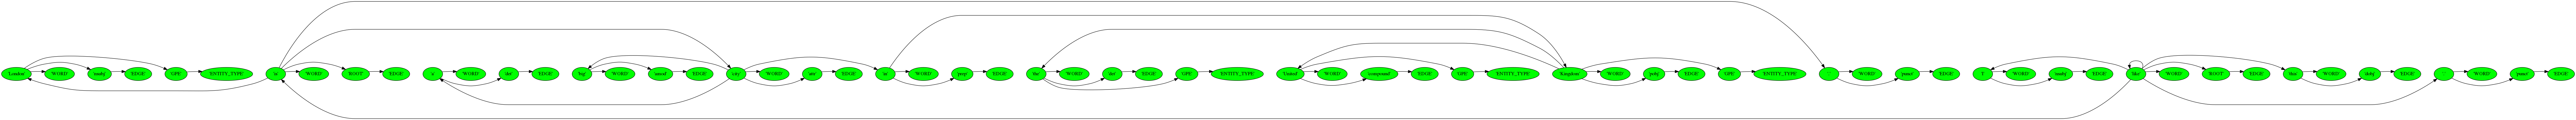

[   3646 1297615 1297618 1297616      31 1297614     117 1297615   53146
 1297616     112 1297615      48 1297616     385 1297615 1297619 1297616
     853 1297615      43 1297616     120 1297615      60 1297616     109
 1297615      48 1297616      31 1297614    2014 1297615    9123 1297616
      31 1297614    7453 1297615 1297620 1297616      31 1297614      70
 1297615      62 1297616     110 1297615 1297618 1297616     145 1297615
   53146 1297616     139 1297615 1297621 1297616      70 1297615      62
 1297616]
[  6  -1  -2  -1  -4  -1  46  -1  -2  -1   8  -1  -2  -1   4  -1  -2  -1
 -12  -1  -2  -1  -4  -1  -2  -1  12  -1  -2  -1  -4  -1   6  -1  -2  -1
  -4  -1 -16  -1  -2  -1  -4  -1 -38  -1  -2  -1   4  -1  -2  -1   0  -1
  -2  -1  -4  -1  -2  -1  -8  -1  -2  -1]


In [17]:
#(seq_data, seq_parents, root) = read_sentence2('A very shy monkey is practicing martial arts. I like this.', True) 
(seq_data, seq_parents, root) = read_sentence2('London is a big city in the United Kingdom. I like this.', True) 
#new_embeddings, added_count = addMissingEmbeddings(seq_data, vecs)
#new_embeddings, added_count = addMissingEmbeddings(seq_data, new_embeddings)
#vecs = new_embeddings

print(seq_data)
print(seq_parents)

In [7]:
from preprocessing import build_sequence_tree, children_and_roots
children, roots = children_and_roots(seq_parents)
seq_tree = build_sequence_tree(seq_data, children, root)
seq_tree

head: 145
children {
  head: 5593
  children {
    head: 6313
    children {
      head: 291
      children {
        head: 48
      }
    }
    children {
      head: 5132
      children {
        head: 234
        children {
          head: 1297613
        }
      }
      children {
        head: 1297614
      }
    }
    children {
      head: 1297615
    }
  }
  children {
    head: 117
    children {
      head: 44
    }
  }
  children {
    head: 53146
  }
  children {
    head: 5353
    children {
      head: 7686
      children {
        head: 1297614
      }
    }
    children {
      head: 1297616
    }
  }
  children {
    head: 70
    children {
      head: 62
    }
  }
}
children {
  head: 110
  children {
    head: 1297615
  }
}
children {
  head: 53146
}
children {
  head: 139
  children {
    head: 1297616
  }
}
children {
  head: 70
  children {
    head: 62
  }
}

In [2]:
import tensorflow_fold as td
import tensorflow as tf
import numpy as np

embeddings_np = np.load('data/nlp/spacy/dict.vecs')[]
embedding_dim = embeddings_np.shape[1]
lex_size = 1300000
#print('load mappings from: ' + data_fn + '.mapping ...')
#mapping = pickle.load(open(data_fn + '.mapping', "rb"))
assert lex_size >= embeddings_np.shape[0], 'len(embeddings) > lex_size. Can not cut the lexicon!'
embeddings_padded = np.lib.pad(embeddings_np, ((0, lex_size - embeddings_np.shape[0]), (0, 0)), 'mean')

print('embeddings_np.shape: '+str(embeddings_np.shape))
print('embeddings_padded.shape: ' + str(embeddings_padded.shape))




embeddings_np.shape: (1297614, 300)
embeddings_padded.shape: (1300000, 300)


In [4]:
with tf.Graph().as_default():
    W = tf.Variable(tf.constant(0.0, shape=[lex_size, embedding_dim]),
                            trainable=False, name="W")

    embedding_placeholder = tf.placeholder(tf.float32, [lex_size, embedding_dim])
    embedding_init = W.assign(embedding_placeholder)
    a = tf.placeholder(tf.float32)
    
    sess = tf.Session()
    sess.run(embedding_init, feed_dict={embedding_placeholder: embeddings_padded})

In [12]:
embeds = td.Embedding(10000, 300, name='head_embed')

x = sequence_tree_block(300, embeds)
x.eval(seq_tree)
#seq_tree

AttributeError: 'ForwardDeclaration' object has no attribute 'eval'

In [12]:
import tensorflow_fold as td
import tensorflow as tf

lex_size = 5
state_size = 10

expr_decl = td.ForwardDeclaration(td.PyObjectType(), state_size)

# get the head embedding from id
def head(name_):
     return td.Pipe(td.Scalar(dtype='int32'), 
               td.Function(td.Embedding(lex_size, state_size, name='head_embed')), 
               name=name_)
# get the weighted sum of all children
def children_aggr(name_):
     return td.Pipe(td.Map(expr_decl()), 
                        td.Map(td.Function(lambda x: tf.norm(x) * x)), 
                        td.Reduce(td.Function(tf.add)), 
                        name=name_)

#dummy = td.con

gru_cell = td.ScopedLayer(tf.contrib.rnn.GRUCell(num_units=state_size), 'mygru')

#def aggr_op():
#    return (td.Record([('head', head), ('children', children_aggr)]) >>
#              td.Concat() >>
#              td.FC(state_size, name='FC_aggr'))
    #return ([children_aggr] >> td.RNN(gru_cell, initial_state=head))
    #return (children_aggr)

def cas(seq_tree):    
    # process and aggregate
    if len(seq_tree['children']) > 0 and seq_tree['head'] is not None:
        return 0
    # dont process children
    if len(seq_tree['children']) == 0:
        return 1
    # process children only
    return 2
    
    
cases = td.OneOf(lambda x: cas(x),
                     {1: td.Record([('head', head('head') >> td.Broadcast()), ('children', children_aggr('children_aggr') >> td.Broadcast())]) 
                      >> td.Zip() 
                      >> td.Reduce(td.Function(tf.add)), #td.RNN(gru_cell, initial_state_from_input=True),
                      2: td.GetItem('head') >> td.Optional(head('just_head')),
                      3: td.GetItem('children') >> children_aggr('just_children')})


expr_decl.resolve_to(cases)

In [ ]:
cases2 = td.OneOf(lambda x: cas(x),
                     {1: td.Record([('head', head('head') >> td.Broadcast()), ('children', children_aggr('children_aggr') >> td.Broadcast())]) 
                      >> td.Zip() 
                      >> td.Reduce(td.Function(tf.add)), #td.RNN(gru_cell, initial_state_from_input=True),
                      2: td.GetItem('head') >> td.Optional(head('just_head'))})

In [25]:
import numpy as np
def calc_embedding_avg(seq):
    seq_data, seq_types, seq_parents, seq_edges = seq
    e = np.zeros(nlp.vocab.vectors_length) # TODO: check dim of embeddings!
    for i in range(len(seq_data)):
        e += data_vecs[seq_types[i]][seq_data[i]]
    return e / len(seq_data) # average

In [26]:
calc_embedding_avg(read_sentence('A very shy monkey is practicing martial arts.'))

array([  1.07410002e-02,   1.04797661e-01,  -9.15853009e-02,
        -5.72742199e-02,   1.87026666e-01,  -2.82920011e-02,
         3.37927755e-02,  -1.95071244e-01,  -3.40955622e-03,
         2.12087999e+00,  -1.69830299e-01,   1.09519947e-02,
        -6.34260000e-02,  -1.11622448e-01,  -1.12552635e-02,
         1.59957554e-01,   1.04001443e-01,   8.65459439e-01,
        -2.38412996e-01,   5.50149985e-02,  -7.51673329e-02,
        -1.80346219e-01,  -8.34840544e-02,  -1.11868726e-01,
         8.09453333e-02,  -6.86778910e-02,  -1.04682251e-02,
        -4.30825555e-02,   6.12711095e-02,  -2.60911190e-01,
        -4.86684436e-02,   4.19144664e-03,   1.84042576e-01,
        -2.16793002e-01,   1.31033664e-01,  -8.43688916e-02,
         6.11080002e-02,  -5.91083342e-02,  -1.17230153e-01,
        -3.09220557e-01,   1.51952467e-01,   1.42462335e-01,
         1.21541668e-01,  -3.40155537e-02,   2.18288891e-01,
         2.27417561e-01,  -7.52422234e-02,   5.98678859e-02,
        -1.67224473e-02,

In [29]:
doc = nlp(u"Apples and oranges are ASdjkhaksdhkahd. Boots and hippos aren't.")

apples = doc[0]
oranges = doc[2]
boots = doc[6]
hippos = doc[8]

In [31]:
doc[4].orth

1510419

In [32]:
doc2 = nlp(u"Hello you ASdjkhaksdhkahd.")
doc2[2].orth

1510419

In [33]:
len(doc.vocab)

1297627

In [ ]:
#TODO: